In [22]:
from consistent_plots import hist
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [89]:
%run ./generate_features.py

-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Parsing command line arguments.
-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Opening ROOT file NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_reco_preselections.root with columns
----------------------------------------------------------------------------------------------------
                                            TABLE COLUMNS                                           
----------------------------------------------------------------------------------------------------
HX_b1_recojet_m                   HX_b1_recojet_pt                  HX_b1_recojet_ptRegressed         
HX_b1_recojet_eta                 HX_b1_recojet_phi                 HX_b2_recojet_m                   
HX_b2_recojet_pt                  HX_b2_recojet_ptRegressed         HX_b2_recojet_eta                 
HX_b2_recojet_phi                 HY1_b1_recojet_m                  HY1_b1_recojet_pt             

  0%|          | 0/17636 [00:00<?, ?it/s]

-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Generating feature block.
-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Generating training examples.


 25%|██▍       | 625/2520 [00:00<00:00, 6237.07it/s]

-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Generating validation features.


  8%|▊         | 408/5039 [00:00<00:01, 4077.65it/s]

-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Generating testing features.


100%|██████████| 5039/5039 [00:19<00:00, 252.05it/s] 


-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Normalizing the examples.
-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Saving training example scaler to Reco_Inputs/nn_input_MX700_MY400_class_scaler.pkl
-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Saving training example numpy to Reco_Inputs/nn_input_MX700_MY400_class


In [76]:
HX_b2['pt'][10111]

52.0625

In [90]:
HX_b1_pt_train = X_train[np.arange(0,len(X_train), 6),0]
HX_b1_pt_val = X_val[np.arange(0,len(X_val), 6),0]
HX_b1_pt_test = X_test[np.arange(0,len(X_test), 15),0]

HX_b1_pt = np.concatenate((HX_b1_pt_train, HX_b1_pt_val, HX_b1_pt_test))

In [91]:
HY1_b1_pt_train = X_train[np.arange(1,len(X_train), 6),0]
HY1_b1_pt_val = X_val[np.arange(1,len(X_val), 6),0]
HY1_b1_pt_test = X_test[np.arange(1,len(X_test), 15),0]
HY1_b1_pt = np.concatenate((HY1_b1_pt_train, HY1_b1_pt_val, HY1_b1_pt_test))

In [92]:
HY2_b1_pt_train = X_train[np.arange(2,len(X_train), 6),0]
HY2_b1_pt_val = X_val[np.arange(2,len(X_val), 6),0]
HY2_b1_pt_test = X_test[np.arange(2,len(X_test), 15),0]
HY2_b1_pt = np.concatenate((HY2_b1_pt_train, HY2_b1_pt_val, HY2_b1_pt_test))

<ipython-input-93-a5213ea4e128>:14: RuntimeWarning: invalid value encountered in true_divide
  ratioX = np.where(n_rX != 0, n_gX / n_rX, np.where(n_gX == n_rX, 1, 0))
<ipython-input-93-a5213ea4e128>:15: RuntimeWarning: invalid value encountered in true_divide
  ratioY1 = np.where(n_rY1 != 0, n_gY1 / n_rY1, np.where(n_gY1 == n_rY1, 1, 0))
<ipython-input-93-a5213ea4e128>:16: RuntimeWarning: invalid value encountered in true_divide
  ratioY2 = np.where(n_rY2 != 0, n_gY2 / n_rY2, np.where(n_gY2 == n_rY2, 1, 0))


Text(0, 0.5, 'Ratio')

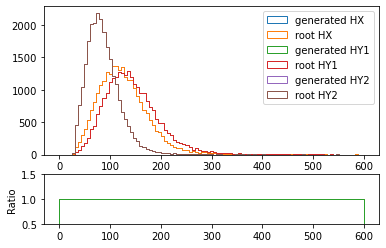

In [93]:
ptbins = np.linspace(0,600,100)
fig = plt.figure()
grid = GridSpec(nrows=2, ncols=1, height_ratios=[3,1])
ax = fig.add_subplot(grid[0,0])
n_gX, b, _ = hist(ax, HX_b1_pt, bins=ptbins, label='generated HX')
n_rX, b, _ = hist(ax, HX_b1['pt'], bins=ptbins, label='root HX')
n_gY1, b, _ = hist(ax, HY1_b1_pt, bins=ptbins, label='generated HY1')
n_rY1, b, _ = hist(ax, HY1_b1['pt'], bins=ptbins, label='root HY1')
n_gY2, b, _ = hist(ax, HY2_b1_pt, bins=ptbins, label='generated HY2')
n_rY2, b, _ = hist(ax, HY2_b1['pt'], bins=ptbins, label='root HY2')
ax.legend()

ax = fig.add_subplot(grid[1,0])
ratioX = np.where(n_rX != 0, n_gX / n_rX, np.where(n_gX == n_rX, 1, 0))
ratioY1 = np.where(n_rY1 != 0, n_gY1 / n_rY1, np.where(n_gY1 == n_rY1, 1, 0))
ratioY2 = np.where(n_rY2 != 0, n_gY2 / n_rY2, np.where(n_gY2 == n_rY2, 1, 0))
x = (ptbins[1:] + ptbins[:-1])/2
hist(ax, x, weights=ratioX, bins=ptbins)
hist(ax, x, weights=ratioY1, bins=ptbins)
hist(ax, x, weights=ratioY2, bins=ptbins)
ax.set_ylim(0.5,1.5)
ax.set_ylabel('Ratio')

In [94]:
HX_b1_eta_train = X_train[np.arange(0,len(X_train), 6),1]
HX_b1_eta_val = X_val[np.arange(0,len(X_val), 6),1]
HX_b1_eta_test = X_test[np.arange(0,len(X_test), 15),1]

HX_b1_eta = np.concatenate((HX_b1_eta_train, HX_b1_eta_val, HX_b1_eta_test))

In [102]:
HY1_b1_eta_train = X_train[np.arange(1,len(X_train), 6),1]
HY1_b1_eta_val = X_val[np.arange(1,len(X_val), 6),1]
HY1_b1_eta_test = X_test[np.arange(1,len(X_test), 15),1]

HY1_b1_eta = np.concatenate((HY1_b1_eta_train, HY1_b1_eta_val, HY1_b1_eta_test))

In [96]:
HY2_b1_eta_train = X_train[np.arange(2,len(X_train), 6),1]
HY2_b1_eta_val = X_val[np.arange(2,len(X_val), 6),1]
HY2_b1_eta_test = X_test[np.arange(2,len(X_test), 15),1]

HY2_b1_eta = np.concatenate((HY2_b1_eta_train, HY2_b1_eta_val, HY2_b1_eta_test))

<ipython-input-105-1ea3dd067abe>:14: RuntimeWarning: invalid value encountered in true_divide
  ratioX = np.where(n_rX != 0, n_gX / n_rX, np.where(n_gX == n_rX, 1, 0))
<ipython-input-105-1ea3dd067abe>:15: RuntimeWarning: invalid value encountered in true_divide
  ratioY1 = np.where(n_rY1 != 0, n_gY1 / n_rY1, np.where(n_gY1 == n_rY1, 1, 0))
<ipython-input-105-1ea3dd067abe>:16: RuntimeWarning: invalid value encountered in true_divide
  ratioY2 = np.where(n_rY2 != 0, n_gY2 / n_rY2, np.where(n_gY2 == n_rY2, 1, 0))


Text(0, 0.5, 'Ratio')

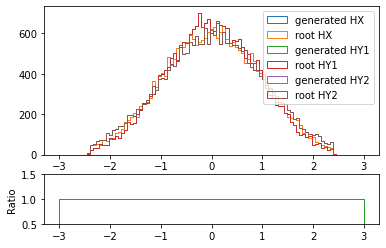

In [105]:
etabins = np.linspace(-3,3,100)
fig = plt.figure()
grid = GridSpec(nrows=2, ncols=1, height_ratios=[3,1])
ax = fig.add_subplot(grid[0,0])
n_gX, b, _ = hist(ax, HX_b1_eta, bins=etabins, label='generated HX')
n_rX, b, _ = hist(ax, HX_b1['eta'], bins=etabins, label='root HX')
n_gY1, b, _ = hist(ax, HY1_b1_eta, bins=etabins, label='generated HY1')
n_rY1, b, _ = hist(ax, HY1_b1['eta'], bins=etabins, label='root HY1')
n_gY2, b, _ = hist(ax, HY2_b1_eta, bins=etabins, label='generated HY2')
n_rY2, b, _ = hist(ax, HY2_b1['eta'], bins=etabins, label='root HY2')
ax.legend()

ax = fig.add_subplot(grid[1,0])
ratioX = np.where(n_rX != 0, n_gX / n_rX, np.where(n_gX == n_rX, 1, 0))
ratioY1 = np.where(n_rY1 != 0, n_gY1 / n_rY1, np.where(n_gY1 == n_rY1, 1, 0))
ratioY2 = np.where(n_rY2 != 0, n_gY2 / n_rY2, np.where(n_gY2 == n_rY2, 1, 0))
x = (etabins[1:] + etabins[:-1])/2
hist(ax, x, weights=ratioX, bins=etabins)
hist(ax, x, weights=ratioY1, bins=etabins)
hist(ax, x, weights=ratioY2, bins=etabins)
ax.set_ylim(0.5,1.5)
ax.set_ylabel('Ratio')